In [570]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [571]:
# calculate the distance between two vectors:

def calc_distance(v1, v2):
    dist = np.sqrt(np.sum(np.square(v1 - v2)))
    return dist

# def calc_distance(matrix, center):
#     dist = np.sqrt(np.sum(np.asarray(matrix - center) ** 2, axis=1))
#     return dist

In [694]:
# my kmeans function:
def my_kmeans(data, k):
    s, c = data.shape
    print("Chanels: ", c)
    
    centers = []
    
    # Randomly initialize cluster centers:
    for i in range(k):
        ran_i = np.random.randint(0, s)
        print(ran_i)
        centers.append(data[ran_i])
#     print("centers: ", len(centers), centers)
    
    # run cluster
    new_centers = centers.copy()
    print("centers:", centers)
    finished = False
    counter = 1
    while not finished:    
        print("\n***** Round:", counter)
        counter += 1
    
        labels = np.zeros(s)      # reset labels
        finished = True
        
        for i in range(s):
            distances = []
            # calculate the distance to each center
            for ci in range(k):
                center = centers[ci]
                distances.append(calc_distance(center, data[i]))
            min_dist_ci = distances.index(min(distances))
#             print("distances:", distances, ", min:", min_dist_ci)
            labels[i] = min_dist_ci
        
#         print("labels:", labels)
        # calculate and update center
        for ci in range(k):
#             print("\n", ci, ":", labels[labels == ci].size)
            if labels[labels == ci].size:
                new_centers[ci] = np.mean(data[labels == ci], axis=0)
            else:
                new_centers[ci] = data[np.random.randint(0, s)]
            
            # finished?
            if (new_centers[ci] != centers[ci]).any():
#                 print(ci, " not satisfied：")
#                 print("old: ", centers[ci])
#                 print("new: ", new_centers[ci])
                finished = False
        
        centers = new_centers.copy()               # update centers
        
    return labels

In [680]:
def get_data(img, withCoordinates=True):
    c = 5 if withCoordinates else 3
    h, w, _ = img.shape
    img_ = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    data = np.zeros((h, w, c)).astype(np.float32)
    for i in range(h):
        for j in range(w):
            pl, pa, pb = img_[i, j]
            if withCoordinates:
                data[i][j] = np.array([pl, pa, pb, i, j])
            else:
                data[i][j] = np.array([pl, pa, pb])
    return data.reshape(h * w, c)


In [681]:
# def data2imgs(data, img):
#     k, l, c = data.shape
#     h, w, _ = img.shape
#     data = data[:, :, :3]
#     return data.reshape([k, h, w, 3])

In [682]:
from datetime import datetime 

(384, 512, 3)


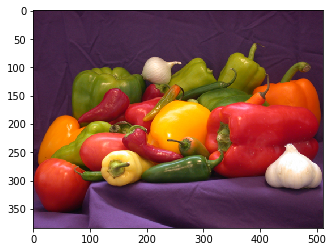

(196608, 5)
Chanels:  5
12790
120990
58570
147576
112153
183237
centers: [array([ 41., 148., 115.,  24., 502.], dtype=float32), array([107., 176.,  46., 236., 158.], dtype=float32), array([155., 124., 112., 114., 202.], dtype=float32), array([124., 109., 112., 288., 120.], dtype=float32), array([121., 146.,  63., 219.,  25.], dtype=float32), array([ 38., 149., 115., 357., 453.], dtype=float32)]

***** Round: 1

***** Round: 2

***** Round: 3

***** Round: 4

***** Round: 5

***** Round: 6

***** Round: 7

***** Round: 8

***** Round: 9

***** Round: 10

***** Round: 11

***** Round: 12

***** Round: 13

***** Round: 14

***** Round: 15

***** Round: 16

***** Round: 17

***** Round: 18

***** Round: 19

***** Round: 20

***** Round: 21

***** Round: 22

***** Round: 23

***** Round: 24

***** Round: 25

***** Round: 26

***** Round: 27

***** Round: 28

***** Round: 29

***** Round: 30

***** Round: 31

***** Round: 32

***** Round: 33

***** Round: 34

***** Round: 35

***** Round: 36

In [718]:
# img = plt.imread('Task2\mandm.png')
img = cv2.imread('Task2\peppers.png')
print(img.shape)
h, w, c = img.shape


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

data = get_data(img)

k = 6
print(data.shape)
res = my_kmeans(data, k)

print("\n\nres:", res)

In [719]:
def get_hsv_colors(k):
    colors = []
    div = 360 / k
    for h in range(k):
        colors.append((h * div, 1, 255))
    return colors

In [720]:
def get_ran_color(k):
    colors = np.zeros((k, 3))
    div = 255 / k
    for i in range(k):
        r = (0 + div * i) % 256
        g = (div * 2 + div * i) % 256
        b = (div * 4 + div * i) % 256
#         r = np.random.randint(0, 255)
#         g = np.random.randint(0, 255)
#         b = np.random.randint(0, 255)
        colors[i] = np.array([r, g, b])
    return colors

[(0.0, 1, 255), (60.0, 1, 255), (120.0, 1, 255), (180.0, 1, 255), (240.0, 1, 255), (300.0, 1, 255)]
87006
87570
104415
101031
103896
105906
(384, 512, 3)


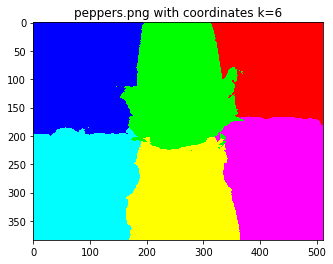

In [721]:
colors = get_hsv_colors(k)
# colors = get_ran_color(k)
print(colors)

new_img = np.zeros((h * w, 3))

for ci in range(k):
    new_img[res == ci] = colors[ci]
    print(new_img[res == ci].size)
        
new_img = new_img.reshape((h, w, 3)).astype(np.float32)
new_img = cv2.cvtColor(new_img, cv2.COLOR_HSV2RGB)

print(new_img.shape)

plt.title("peppers.png with coordinates k=" + str(k))
plt.imshow(new_img / 255.0)
plt.show()

In [687]:
# without position:

In [688]:
# img = plt.imread('Task2\mandm.png')

data2 = get_data(img, False)

print(data2.shape)
res2 = my_kmeans(data2, k)

print("\n\nres:", res2)

(196608, 3)
Chanels:  3
147944
163585
171360
centers: [array([187., 126., 107.], dtype=float32), array([ 69., 151., 115.], dtype=float32), array([ 55., 147., 116.], dtype=float32)]

***** Round: 1

***** Round: 2

***** Round: 3

***** Round: 4

***** Round: 5

***** Round: 6

***** Round: 7

***** Round: 8

***** Round: 9

***** Round: 10

***** Round: 11

***** Round: 12

***** Round: 13


res: [2. 2. 2. ... 2. 2. 2.]


132033
121908
335883
0
0
0
(384, 512, 3)


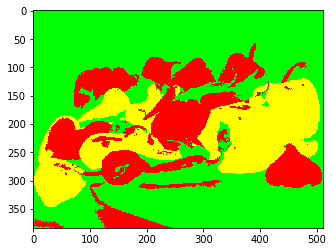

In [695]:
new_img2 = np.zeros((h * w, 3))

for ci in range(k):
    new_img2[res2 == ci] = colors[ci]
    print(new_img2[res2 == ci].size)
        
new_img2 = new_img2.reshape((h, w, 3)).astype(np.float32)
new_img2 = cv2.cvtColor(new_img2, cv2.COLOR_HSV2RGB)

print(new_img2.shape)

plt.imshow(new_img2 / 255.0)
plt.show()

In [690]:
# Task2\mandm.png

(394, 451, 3)
(177694, 3)
Chanels:  3
15827
158469
42938
68031
126532
157049
centers: [array([208., 117., 114.], dtype=float32), array([167., 113., 109.], dtype=float32), array([139., 146., 181.], dtype=float32), array([212., 111., 118.], dtype=float32), array([207.,  84., 117.], dtype=float32), array([178., 112., 112.], dtype=float32)]

***** Round: 1

***** Round: 2

***** Round: 3

***** Round: 4

***** Round: 5

***** Round: 6

***** Round: 7

***** Round: 8

***** Round: 9

***** Round: 10

***** Round: 11

***** Round: 12

***** Round: 13

***** Round: 14

***** Round: 15

***** Round: 16

***** Round: 17

***** Round: 18

***** Round: 19

***** Round: 20

***** Round: 21

***** Round: 22

***** Round: 23

***** Round: 24

***** Round: 25

***** Round: 26

***** Round: 27

***** Round: 28

***** Round: 29

***** Round: 30

***** Round: 31

***** Round: 32

***** Round: 33

***** Round: 34

***** Round: 35

***** Round: 36

***** Round: 37

***** Round: 38

***** Round: 39

***** 

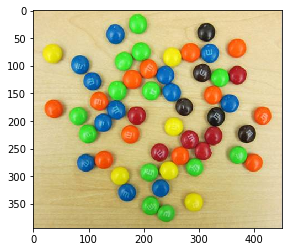

In [691]:
# img = plt.imread('Task2\mandm.png')
img2 = cv2.imread('Task2\mandm.png')
print(img2.shape)
h2, w2, c2 = img2.shape

k = 6

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

data3 = get_data(img2, False)
# data3 = get_data(img2, True)

print(data3.shape)
start3 = datetime.now()
res3 = my_kmeans(data3, k)
end3 = datetime.now()

print("Time:", (end3 - start3).seconds)

print("\n\nres2:", res3)

[(0.0, 1, 255), (60.0, 1, 255), (120.0, 1, 255), (180.0, 1, 255), (240.0, 1, 255), (300.0, 1, 255)]
139746
47349
42783
237477
33363
32364
(394, 451, 3)


[]

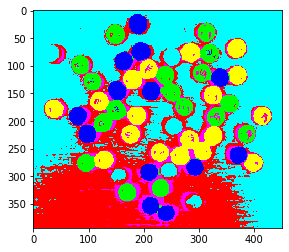

In [692]:
colors = get_hsv_colors(6)

new_img3 = np.zeros((h2 * w2, 3))
print(colors)

for ci in range(k):
    new_img3[res3 == ci] = colors[ci]
    print(new_img3[res3 == ci].size)
        
new_img3 = new_img3.reshape(h2, w2, 3).astype(np.float32)
new_img3 = cv2.cvtColor(new_img3, cv2.COLOR_HSV2RGB)

print(new_img3.shape)

plt.imshow(new_img3 / 255.0)
plt.show()

In [693]:
# K-means++

In [676]:
def my_kmeans_pp(data, k):
    s, c = data.shape
        
    # Initialize cluster centers:
    startt = datetime.now()
    centers = []
    centers.append(data[np.random.randint(0, s)])
    d = np.zeros(s)
    for _ in range(k - 1):
        total = 0.0
        for i in range(s):
            distances = []
            for center in centers:
                distances.append(calc_distance(center, data[i]))
            d[i] = distances.index(min(distances))
            total += d[i]
        total *= np.random.random()
        for i in range(s):
            total -= d[i]
            if total > 0:
                continue
            centers.append(data[i])
            break
        
    endt = datetime.now()
    print("Initialize Time:", (endt - startt).seconds)
    print("centers: ", len(centers), centers)

    # run cluster
    startt = datetime.now()
    new_centers = centers.copy()
#     print("centers:", centers)
    finished = False
    counter = 1
    while not finished:    
        print("\n***** Round:", counter)
        counter += 1
    
        labels = np.zeros(s)      # reset labels
        finished = True
        
        for i in range(s):
            distances = []
            # calculate the distance to each center
            for ci in range(k):
                center = centers[ci]
                distances.append(calc_distance(center, data[i]))
            min_dist_ci = distances.index(min(distances))
            # print("distances:", distances, ", min:", min_dist_ci)
            labels[i] = min_dist_ci
        
        # print("labels:", labels)
        # calculate and update center
        for ci in range(k):
            if labels[labels == ci].size:
                new_centers[ci] = np.mean(data[labels == ci], axis=0)
            else:
                new_centers[ci] = data[np.random.randint(0, s)]
            
            # finished?
            if (new_centers[ci] != centers[ci]).any():
#                 print(ci, " not satisfied：")
#                 print("old: ", centers[ci])
#                 print("new: ", new_centers[ci])
                finished = False
        
        centers = new_centers.copy()               # update centers
    
    endt = datetime.now()    
    print("Loop Time:", (endt - startt).seconds)

    return labels

In [677]:
data4 = get_data(img2, False)

print(data4.shape)
start4 = datetime.now()
res4 = my_kmeans_pp(data4, k)
end4 = datetime.now()

print("Time:", (end4 - start4).seconds)

print("\n\nres2:", res4)

(177694, 3)
Initialize Time: 15
centers:  6 [array([206.,  86., 114.], dtype=float32), array([204., 114., 113.], dtype=float32), array([156., 112., 112.], dtype=float32), array([177., 116., 103.], dtype=float32), array([169., 112., 112.], dtype=float32), array([167., 116., 115.], dtype=float32)]

***** Round: 1

***** Round: 2

***** Round: 3

***** Round: 4

***** Round: 5

***** Round: 6

***** Round: 7

***** Round: 8

***** Round: 9

***** Round: 10

***** Round: 11

***** Round: 12

***** Round: 13

***** Round: 14

***** Round: 15

***** Round: 16

***** Round: 17

***** Round: 18

***** Round: 19

***** Round: 20

***** Round: 21

***** Round: 22

***** Round: 23

***** Round: 24

***** Round: 25

***** Round: 26

***** Round: 27

***** Round: 28

***** Round: 29

***** Round: 30

***** Round: 31

***** Round: 32

***** Round: 33

***** Round: 34

***** Round: 35
Loop Time: 203
Time: 219


res2: [1. 1. 1. ... 1. 1. 1.]


33291 (0.0, 1, 255)
274161 (60.0, 1, 255)
47799 (120.0, 1, 255)
129876 (180.0, 1, 255)
17526 (240.0, 1, 255)
30429 (300.0, 1, 255)
(394, 451, 3)


[]

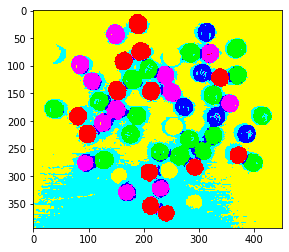

In [678]:
new_img4 = np.zeros((h2 * w2, 3))
# print(colors)

for ci in range(k):
    new_img4[res4 == ci] = colors[ci]
    print(new_img4[res4 == ci].size, colors[ci])
        
new_img4 = new_img4.reshape((h2, w2, 3)).astype(np.float32)
new_img4 = cv2.cvtColor(new_img4, cv2.COLOR_HSV2RGB)

print(new_img4.shape)

plt.imshow(new_img4 / 255.0)
plt.show()